# Arabic News Classification - 03

## Visualizations

Here, the final model created and trained in [models.py](models.py) is loaded and visualizations are generated to be used in the presentation.

In [2]:
import pickle

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from tools import misc
from tools import visualizations as vis

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
nb_model = misc.load('outputs/models/nb_full_train.pkl')
val_texts_cv = misc.load('outputs/models/val_texts_cv.pkl')
val_labels = misc.load('outputs/models/val_labels.pkl')

In [4]:
val_preds = nb_model.predict(val_texts_cv)

In [5]:
cm = confusion_matrix(val_labels, val_preds, normalize='true')
acc = accuracy_score(val_labels, val_preds)
print(acc)

0.9295


In [6]:
annot_kws = {
    'size': 16,
    'weight': 300,
    'style': 'italic'
}

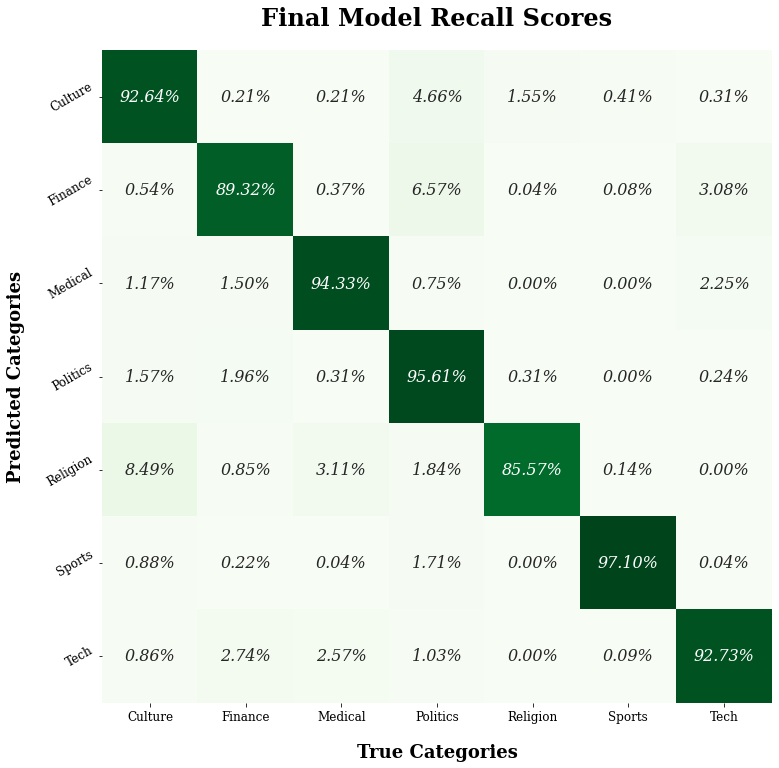

In [7]:
with plt.style.context('images/presentation.mplstyle'):

    fig, ax = plt.subplots()

    sns.heatmap(
        cm,
        cmap='Greens',
        cbar=False,
        annot=True,
        annot_kws=annot_kws,
        fmt='.2%',
        ax=ax
    )

    ax.set_title("Final Model Recall Scores")
    ax.set_ylabel("Predicted Categories")
    ax.set_xlabel("True Categories")
    ax.set_xticklabels(misc.CLASSES)
    ax.set_yticklabels(misc.CLASSES, rotation=30)
    
    plt.savefig('images/final_model_cm_pres.png')

In [8]:
class_counts = misc.load('outputs/class_counts.pkl')
source_counts = misc.load('outputs/source_counts.pkl')

In [9]:
source_counts_df = pd.DataFrame.from_dict(source_counts, orient='columns')
source_counts_df

,Khaleej,Arabiya,Akhbarona
Sports,6500,23058,15755
Politics,6500,4368,13979
Religion,6500,0,7522
Medical,6500,3715,12947
Finance,6500,30076,9280
Tech,6500,4410,12199
Culture,6500,5619,6747


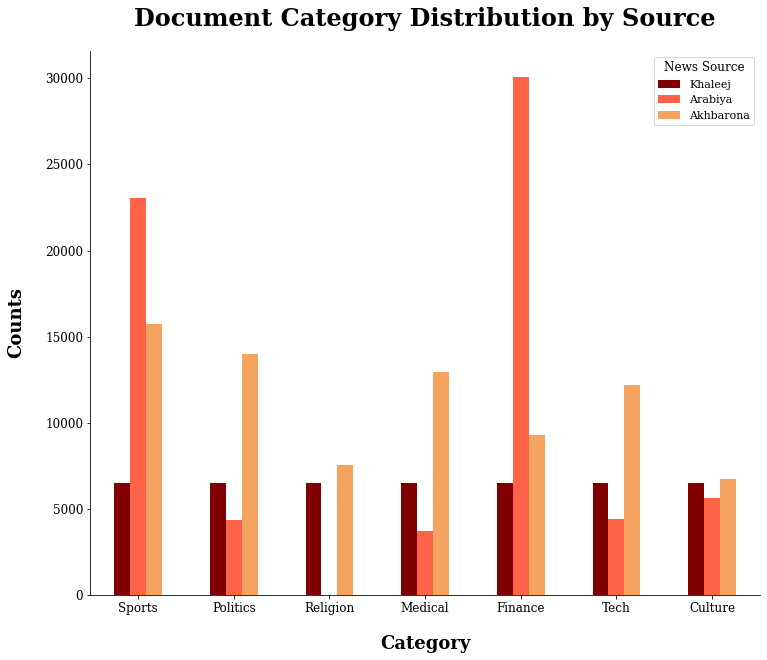

In [80]:
with plt.style.context('images/presentation.mplstyle'):
    fig, ax = plt.subplots(figsize=(12, 10))

    source_counts_df.plot.bar(ax=ax, rot=0)
    ax.set_title('Document Category Distribution by Source')
    ax.set_xlabel('Category')
    ax.set_ylabel('Counts')
    ax.legend(fontsize=11, title='News Source', title_fontsize=12)
    
    plt.savefig('images/source_counts_presentation.png')

In [11]:
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Total Count'])
class_counts_df

,Total Count
Sports,45313
Politics,24847
Religion,14022
Medical,23162
Finance,45856
Tech,23109
Culture,18866


In [99]:
percent_frequencies = (class_counts_df / class_counts_df['Total Count'].sum()).values.flatten()

<Figure size 864x720 with 0 Axes>

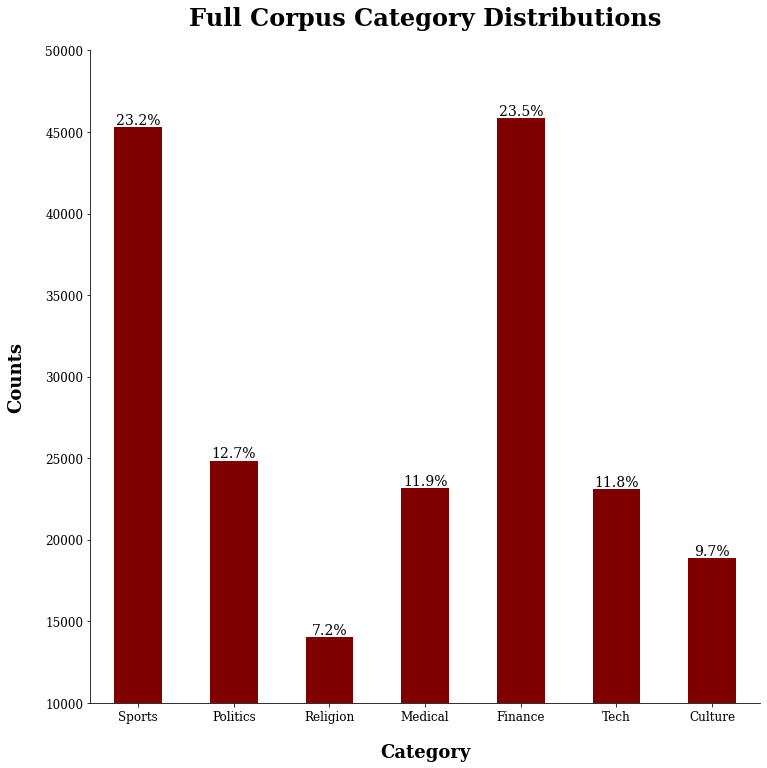

In [105]:
with plt.style.context('images/presentation.mplstyle'):
    fig = plt.figure(figsize=(12, 10))

    ax = class_counts_df.plot.bar(rot=0, legend=False)
    rects = ax.patches
    labels = [f'{freq:.1%}' for freq in percent_frequencies]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom", size=14
        )
    
    ax.set_title('Full Corpus Category Distributions')
    ax.set_xlabel('Category')
    ax.set_ylabel('Counts')
    ax.set_ylim(10_000, 50_000)
    
    plt.savefig('images/class_count_presentation.png');

In [13]:
baseline_scores = misc.load('outputs/evaluations/baseline_scores_df.pkl')
testing_accuracies = list(baseline_scores['Testing'])
print(testing_accuracies)

[0.9556043956043956, 0.9912087912087912, 0.9683516483516483, 0.9821978021978022]


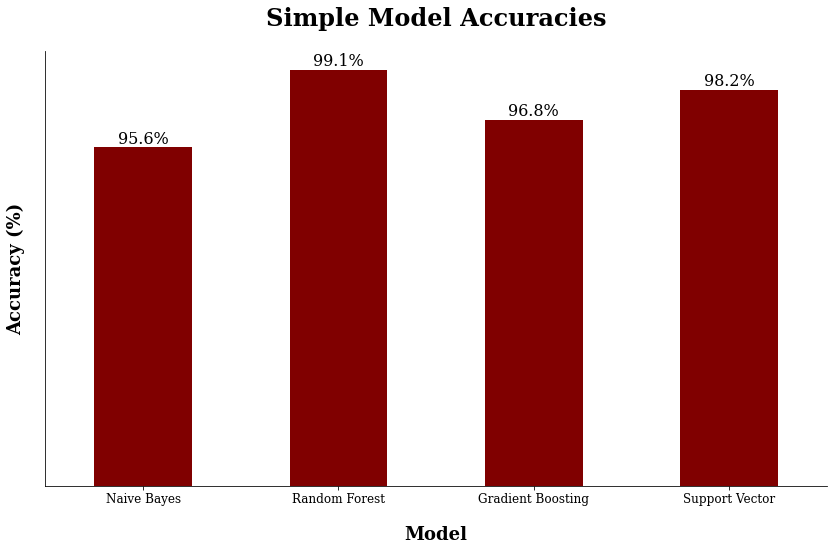

In [82]:
with plt.style.context('images/presentation.mplstyle'):
    plt.figure(figsize=(14, 8))
    ax = baseline_scores['Testing'].plot.bar(rot=0)
    rects = ax.patches
    labels = [f'{acc:.1%}' for acc in testing_accuracies]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom", size=16
        )
    
    plt.title("Simple Model Accuracies")
    plt.ylim(0.8, 1.0)
    plt.yticks([])
    plt.xlabel('Model')
    plt.ylabel('Accuracy (%)')
    
    plt.savefig('images/baseline_scores_presentation.png')

In [72]:
stopwords = misc.get_stopwords()

tech_sample = subset_df.loc[subset_df['cls'] == 'tech', :].head()
tech_sample_text = ' '.join(list(filter(lambda x: x not in stopwords, list(culture_sample['text'].values))))

In [73]:
import arabic_reshaper
from bidi.algorithm import get_display

sample_reshaped = arabic_reshaper.reshape(tech_sample_text)
text = get_display(sample_reshaped)

wordcloud = WordCloud(
    font_path='fonts/NotoNaskhArabic-Regular.ttf',
    normalize_plurals=False,
    stopwords=stopwords
).generate(text)

wordcloud.to_file('images/wordcloud.png')

In [18]:
# subset_df = misc.load('raw_data/corpus_df.pkl')
# count_vectorizer = misc.load('outputs/models/count_vectorizer.pkl')

# subset_cv = count_vectorizer.transform(subset_df['text'])

In [19]:
# subset_df_cv = pd.DataFrame(subset_cv.todense(), columns=count_vectorizer.vocabulary_)
# subset_df_cv['cls'] = subset_df['cls']

In [ ]:
# class_freqs = subset_df_cv.groupby('cls').sum()
# class_freqs

163